In [33]:
import numpy as np

# Transition matrix defines, given the direction we choose to go, what is the probability distribution of the direction we actually go?
T = np.array(
     [
        [
            [0.66667, 0.00000, 0.33333, 0.00000, 0.00000],
            [0.33333, 0.33333, 0.33333, 0.00000, 0.00000],
            [0.33333, 0.33333, 0.33333, 0.00000, 0.00000],
            [0.66667, 0.33333, 0.00000, 0.00000, 0.00000]
        ],
        [
            [0.33333, 0.33333, 0.00000, 0.33333, 0.33333],
            [0.33333, 0.33333, 0.00000, 0.33333, 0.33333],
            [0.00000, 0.66667, 0.00000, 0.33333, 0.33333],
            [0.33333, 0.66667, 0.00000, 0.00000, 0.00000]
        ],
        [
            [0.00000, 0.00000, 1.00000, 0.00000, 0.00000],
            [0.00000, 0.00000, 1.00000, 0.00000, 0.00000],
            [0.00000, 0.00000, 1.00000, 0.00000, 0.00000],
            [0.00000, 0.00000, 1.00000, 0.00000, 0.00000]
        ],
        [
            [0.00000, 0.00000, 1.00000, 1.00000, 0.00000],
            [0.00000, 0.00000, 1.00000, 1.00000, 0.00000],
            [0.00000, 0.00000, 1.00000, 1.00000, 0.00000],
            [0.00000, 0.00000, 1.00000, 1.00000, 0.00000]
        ]
    ] 
)

actions = ["left", "down", "right", "up"]
reward_index = 4

## Recall the Frozen Lake Game...

![image](FrozenLake1.png)

![image](FrozenLake2.png)

In [34]:
def policy_iteration(policy: list[int]):
    Q = np.zeros((4,4))
    Q_copy = np.zeros((4,4))

    # We make our policy and Q table and our Q copy for while we are updating the Q
    # table.
    Q = np.zeros((4, 4))
    Q_copy = np.zeros((4, 4))

    # For 10 iterations we refine our estimate of the Q values for this policy
    for iteration in range(10):
        print(f"Iteration: {iteration}")
        print(Q)
        q = 0

        for state in range(4):
            for action in range(4):
                reward = T[state,action,reward_index]
                for next_state in range(4):
                    # next action DOES follow our policy
                    next_action = policy[next_state]
                    q = q + T[state,action,next_state]*Q[next_state,next_action]
                q=q+reward
                Q_copy[state,action] = q
                q=0

        Q = Q_copy.copy()

### What if we take other actions? We are answering the question: "What is the value of ALL actions according to our policy?"

###  Now let's pick a better policy...

In [35]:
import numpy as np
policy = [2, 1, 2, 2]
policy_iteration(policy=policy)

Iteration: 0
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Iteration: 1
[[0.      0.      0.      0.     ]
 [0.33333 0.33333 0.33333 0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]]
Iteration: 2
[[0.         0.11110889 0.11110889 0.11110889]
 [0.44443889 0.44443889 0.55555111 0.22222111]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Iteration: 3
[[0.07407296 0.18518074 0.18518074 0.22221778]
 [0.51851074 0.51851074 0.62962407 0.33333   ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Iteration: 4
[[0.12345444 0.23456148 0.23456148 0.29628963]
 [0.56789148 0.56789148 0.67900556 0.40740185]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Iteration: 5
[[0.1563751  0.26748165 0.26748165 0.34567037]
 [0.60081165 0.60081165 0.71192621 0.45678259]
 [0.         0.         0.         0.        ]
 [0.        

### Now let's try a different policy...

In [36]:
policy = [3,2,2,2]
policy_iteration(policy=policy)

Iteration: 0
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Iteration: 1
[[0.      0.      0.      0.     ]
 [0.33333 0.33333 0.33333 0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]]
Iteration: 2
[[0.         0.11110889 0.11110889 0.11110889]
 [0.44443889 0.44443889 0.55555111 0.22222111]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Iteration: 3
[[0.07407296 0.22221778 0.22221778 0.25925481]
 [0.55554778 0.55554778 0.70369926 0.40740519]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Iteration: 4
[[0.17283741 0.32098148 0.32098148 0.40740148]
 [0.65431148 0.65431148 0.80246519 0.55555259]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Iteration: 5
[[0.27160235 0.40328486 0.40328486 0.53908807]
 [0.73661486 0.73661486 0.86830946 0.6707786 ]
 [0.         0.         0.         0.        ]
 [0.        

### What if we don't know which policy is good?

In [37]:
def greedy_policy(Q, state):
  return np.argmax(Q[state])

def print_policy(Q):
  for state in range(len(Q)):
    act = np.argmax(Q[state])
    print(f"state: {state}, action {act}: {actions[act]}")

Q = np.zeros((4, 4))
Q_copy = np.zeros((4, 4))
actions = ["left", "down", "right", "up"]

# For 10 iterations we refine our estimate of the Q values for this policy
for iteration in range(10):
  if iteration % 1 == 0:
    print(f"Iteration: {iteration}")
    print(Q)
    print_policy(Q)

  for state in range(4):
    for action in range(4):
      q = 0
      reward = T[state,action,reward_index]
      for next_state in range(4):
        next_action = greedy_policy(Q,next_state)
        q = q + T[state,action,next_state]*Q[next_state,next_action]
      q=q+reward
      Q_copy[state,action] = q
      q=0

  Q = Q_copy.copy()

Iteration: 0
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
state: 0, action 0: left
state: 1, action 0: left
state: 2, action 0: left
state: 3, action 0: left
Iteration: 1
[[0.      0.      0.      0.     ]
 [0.33333 0.33333 0.33333 0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]]
state: 0, action 0: left
state: 1, action 0: left
state: 2, action 0: left
state: 3, action 0: left
Iteration: 2
[[0.         0.11110889 0.11110889 0.11110889]
 [0.44443889 0.44443889 0.55555111 0.22222111]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
state: 0, action 1: down
state: 1, action 2: right
state: 2, action 0: left
state: 3, action 0: left
Iteration: 3
[[0.07407296 0.22221778 0.22221778 0.25925481]
 [0.55554778 0.55554778 0.70369926 0.40740519]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
state: 0, action 3: up
state: 1, action 2: right
state: 2, action 0

![image](NoT.png)

In [38]:
import gymnasium as gym

# env = gym.make("FrozenLake-v1", render_mode="human", desc=["SF", "HG"])
env = gym.make("FrozenLake-v1", desc=["SF", "HG"])
gamma = 1.0
learning_rate = 0.1

# q_new = r + sum:p*q_old

# q_new = learning_rate*(r_observed + q(next_state_observed, next_action))
#           + (1 - learning_rate) * q_old
# e.g. "Some weight on what we used to think and some weight on what we see now"
# G=10, q=10 (G is sum of returns)
# G=5, q=9.5 (0.9*10 + 0.1*5)
# G=5, q=.9*p.95 + 0.1*5 (0.9*0.9*10 + 0.1*0.9*5 + 0.1*5)
# We care more about our recent observations than our past observations...
# This is because our policy changes (and also the environment may be changing).

Q = np.zeros((4, 4))

def greedy_policy(Q, state):
  return np.argmax(Q[state])

def e_greedy_policy(Q, state, epsilon):
   # Balance exploration and exploitation
   if np.random.rand() < epsilon:
      return np.random.randint(0, len(Q[state]))
   else:
      return np.argmax(Q[state])

def print_policy(Q):
  for state in range(len(Q)):
    act = np.argmax(Q[state])
    print(f"state: {state}, action {act}: {actions[act]}")

# obs is the starting state we are in (0 - we start in the top left chair)
for i in range(500):
  obs, info = env.reset()
  done = False
  while not done:
      action = e_greedy_policy(Q,obs,epsilon=0.2) # next action according to Q and according to where we are
      #print(f"obs: {obs}, action: {action}")
      
      new_obs, reward, terminated, truncated, info = env.step(action)
      #print(f"new_obs: {new_obs}")

      # Assume we play greedy for the rest of the game
      Q[obs,action] = (1 - learning_rate)*Q[obs,action] + learning_rate*(reward + int(not done)*gamma*Q[new_obs,greedy_policy(Q,new_obs)])

      obs = new_obs
      done = terminated or truncated # reached end of the game, or you've been wandering and nothing happens so early stop
print(Q)

[[0.52497967 0.74950804 0.66696655 0.99999996]
 [0.98381843 0.99999998 0.99184738 0.9952107 ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]


### What if the table gets too big?

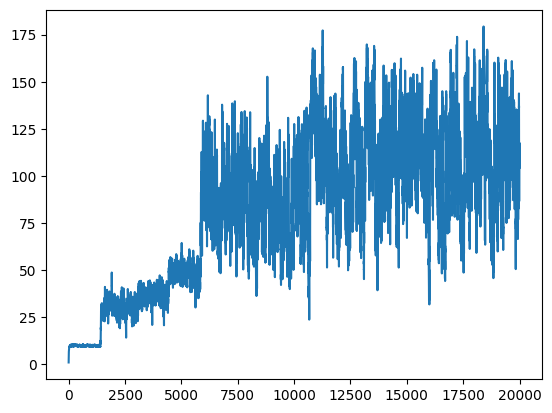

In [39]:
env = gym.make("CartPole-v1")
obs, info = env.reset()
gamma = 0.99
learning_rate = 0.01
Q = np.zeros((2**4, 2))
Q_copy = np.zeros((2**4, 2))

# Discretize our states - 16 buckets (2**4), going left/right, pole left/right, left/right of center, pole moving left/right

def obs_to_discrete(obs):
    disc = 0
    for i in range(len(obs)):
        disc += int(obs[i]>0)*(2**(i)) # creates a bit mask
    return disc


def e_greedy_policy(Q, state, epsilon):
    r = np.random.random()
    if r < epsilon:
        return np.random.randint(0,2)
    else:
        return np.argmax(Q[state])

def print_policy(Q):
    for state in range(len(Q)):
        act = np.argmax(Q[state])
        print(f"state: {state} action {act}{actions[act]}")


reward_hist = []
reward_sum = 0
for n_iter in range(20000):
    obs, info = env.reset()
    done = False
    reward_sum = 0

    while not done:

        state = obs_to_discrete(obs) # discretize function so that we know where we go in our table
        action = e_greedy_policy(Q,state,0.1) # 100/(n_iter+1)
        new_obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        reward_sum += reward

        new_state = obs_to_discrete(new_obs)

        q_new = reward + int(not done)*gamma*np.max(Q[new_state]) # again, in the future we use the greedy policy
        q_old = Q[state,action]
        Q[state,action] = (1-learning_rate)*q_old + learning_rate*(q_new)

        obs = new_obs

    reward_hist.append(reward_sum)

import matplotlib.pyplot as plt

lpsmooth = []
last = 0
for r in reward_hist:
    lpsmooth.append(0.9*last+0.1*r)
    last = lpsmooth[-1]
plt.plot(lpsmooth)
plt.show()
# A perfect agent would be hitting 500 frames each game...

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [41]:
our_matrix_one = np.array([
    [1.0, 2, 3],
    [6,   7, 8]
    ]) # python list form, a 2x3 matrix
our_bias_one = np.zeros((3)) # a 2 array of zeros [0,0]
our_matrix_two = np.array([
    [1  ],
    [2  ],
    [3.0]]) # python list form, a 3x1 matrix
our_bias_two = np.zeros((1)) # a 1 array of zeros [0]
our_data = np.array([
    [-1.0,-1],
    [-1,   1],
    [1,   -1],
    [1,    1]]) # four coordinates
our_targets = np.array([0.0,1,1,0])

print(f"Our Matrix one: ")
print(our_matrix_one)
print(f"Our Matrix two: ")
print(our_matrix_two)
print(f"Our data: ")
print(our_data)
print(f"Our targets: ")
print(our_targets)

Our Matrix one: 
[[1. 2. 3.]
 [6. 7. 8.]]
Our Matrix two: 
[[1.]
 [2.]
 [3.]]
Our data: 
[[-1. -1.]
 [-1.  1.]
 [ 1. -1.]
 [ 1.  1.]]
Our targets: 
[0. 1. 1. 0.]


In [42]:
torch_matrix_one = torch.tensor(our_matrix_one, requires_grad=True).float()
torch_bias_one = torch.tensor(our_bias_one, requires_grad=True).float()
torch_matrix_two = torch.tensor(our_matrix_two, requires_grad=True).float()
torch_bias_two = torch.tensor(our_bias_two, requires_grad=True).float()
torch_data = torch.tensor(our_data).float()
torch_targets = torch.tensor(our_targets).float()

def tanh_active(x):
    return F.tanh(x)

def layer1(x):
    return (torch.matmul(x, torch_matrix_one) + torch_bias_one)

def layer2(x):
    return (torch.matmul(x, torch_matrix_two) + torch_bias_two)

def neural_network_forward(x):
    l1 = layer1(x)
    a1 = tanh_active(l1)
    l2 = layer2(a1)
    ac2 = tanh_active(l2)
    return ac2

#graph np
def graph_np(our_matrix_one, our_bias_one, our_matrix_two, our_bias_two):
  im = np.zeros((150,150))
  x = np.linspace(-1.5,1.5,150)
  y = np.linspace(-1.5,1.5,150)

  for row,r_val in enumerate(y):
    for col,c_val in enumerate(x):
      im[row,col] = ((np.array([[r_val,c_val]])@our_matrix_one)@our_matrix_two)[0,0]
      #im[row,col]
  im[50,50] = our_targets[0]
  im[50,100] = our_targets[1]
  im[100,50] = our_targets[2]
  im[100,100] = our_targets[3]
  plt.imshow(im)
  plt.colorbar()
  plt.show()


def graph_torch():
  im = np.zeros((150,150))
  x = np.linspace(-1.5,1.5,150)
  y = np.linspace(-1.5,1.5,150)

  dat = torch.zeros((150*150,2)).float()
  for row,r_val in enumerate(y):
    for col,c_val in enumerate(x):
      dat[row*150+col,0] = r_val
      dat[row*150+col,1] = c_val
  with torch.no_grad():
     thoughts = neural_network_forward(dat)
    
  for row in range(150):
    for col in range(150):
      im[row,col] = thoughts[row*150+col]

      #im[row,col]
  im[50,50] = our_targets[0]
  im[50,100] = our_targets[1]
  im[100,50] = our_targets[2]
  im[100,100] = our_targets[3]
  plt.imshow(im)
  plt.colorbar()
  plt.show()


Torch Matrix one: 
tensor([[1., 2., 3.],
        [6., 7., 8.]], grad_fn=<ToCopyBackward0>)
torch bias 1
tensor([0., 0., 0.], grad_fn=<ToCopyBackward0>)
Torch Matrix two: 
tensor([[1.],
        [2.],
        [3.]], grad_fn=<ToCopyBackward0>)


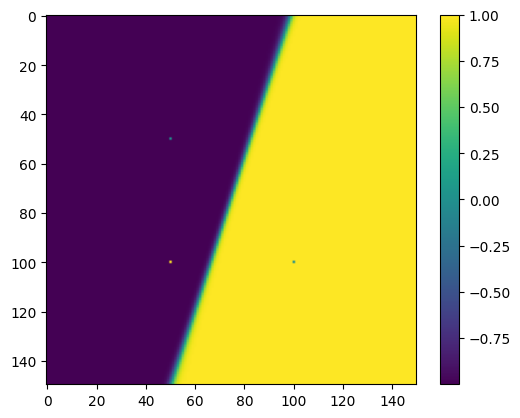

In [43]:
#torch and learn
print(f"Torch Matrix one: ")
print(torch_matrix_one)
print(f"torch bias 1")
print(torch_bias_one)
print(f"Torch Matrix two: ")
print(torch_matrix_two)

graph_torch()

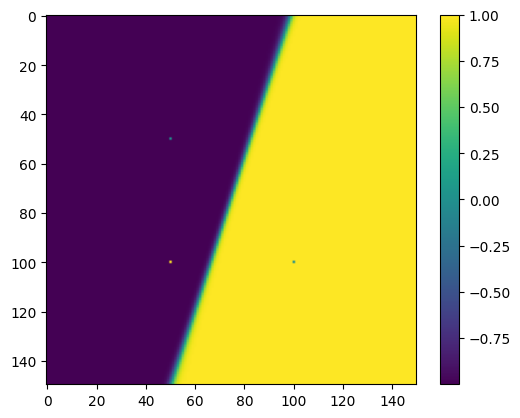

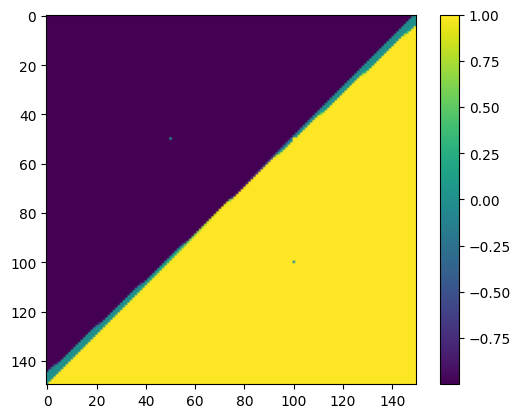

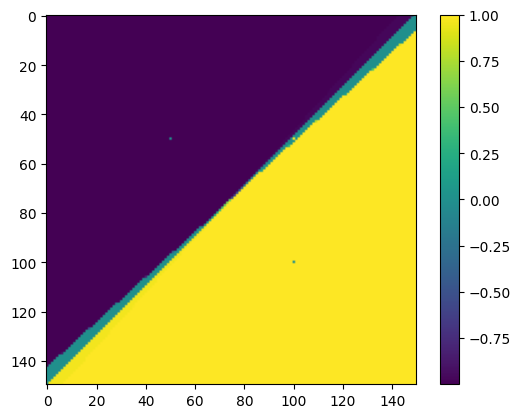

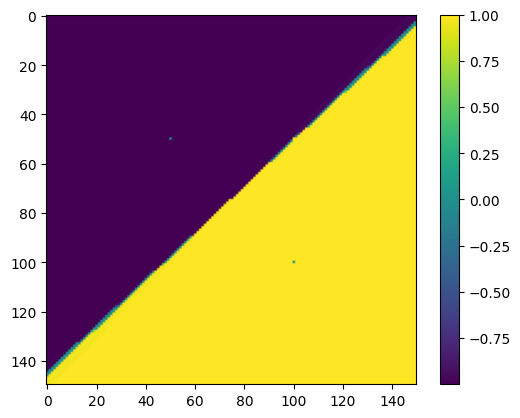

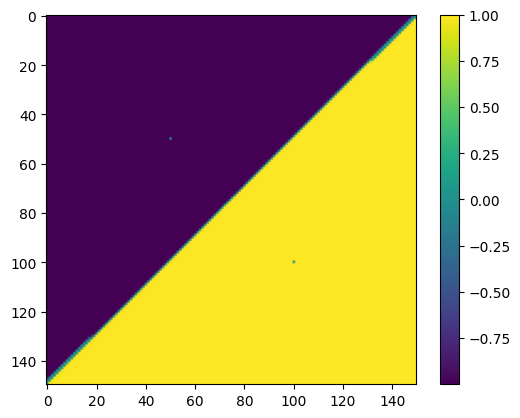

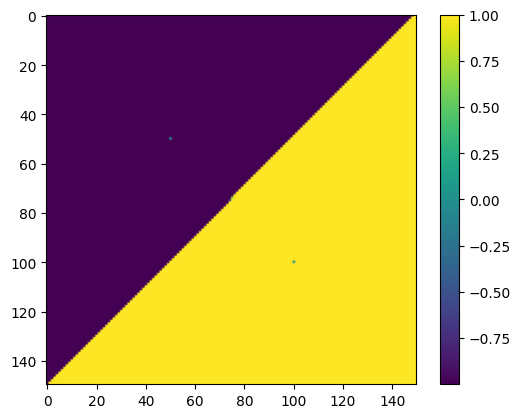

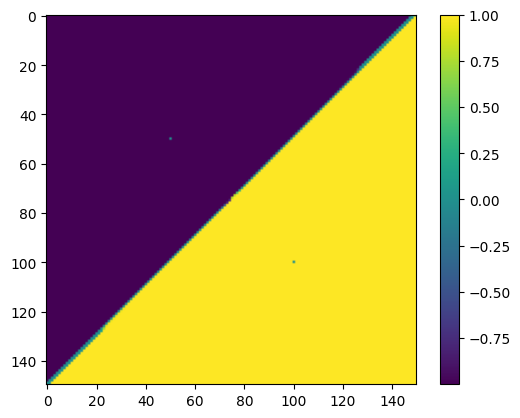

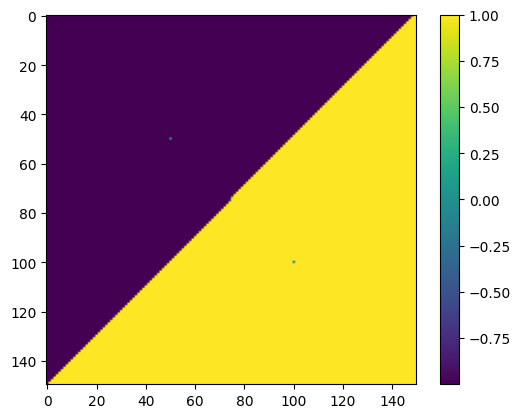

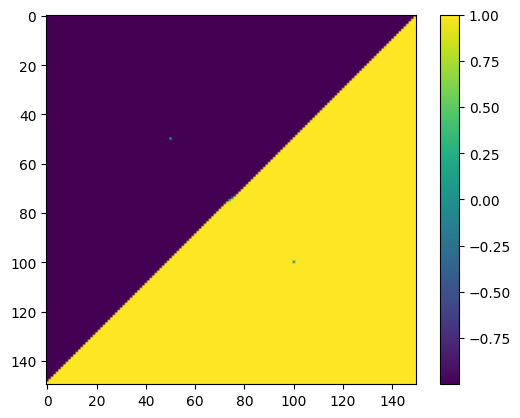

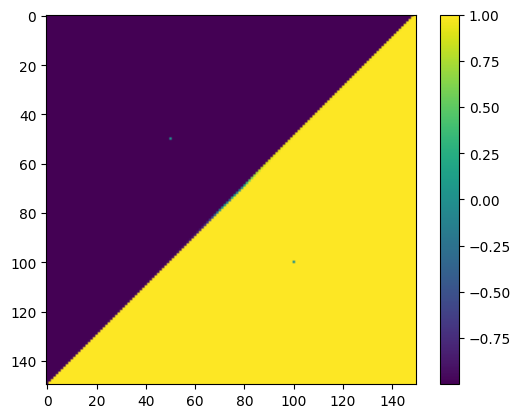

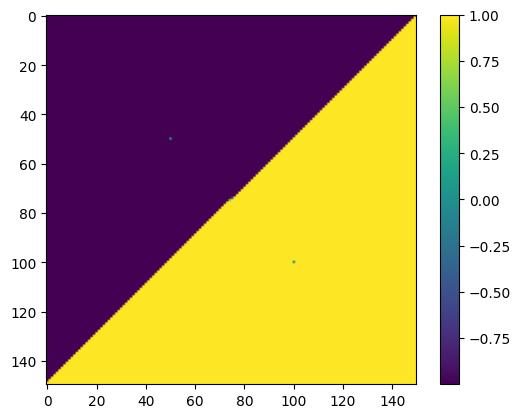

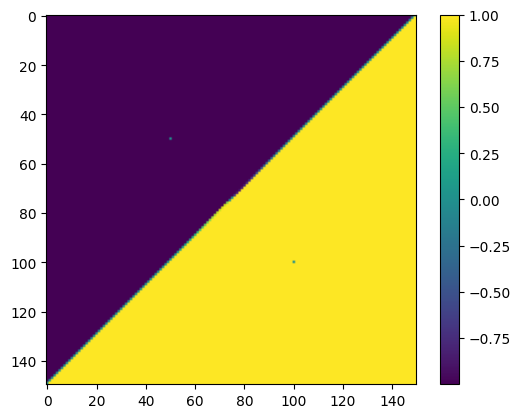

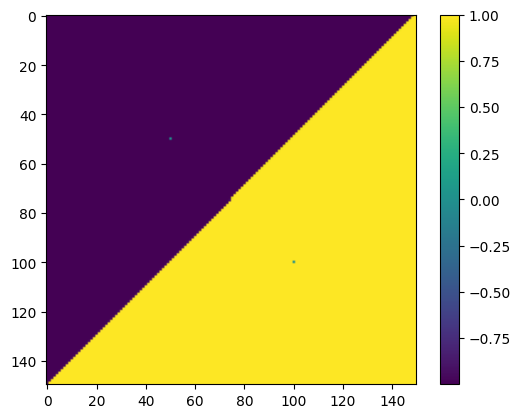

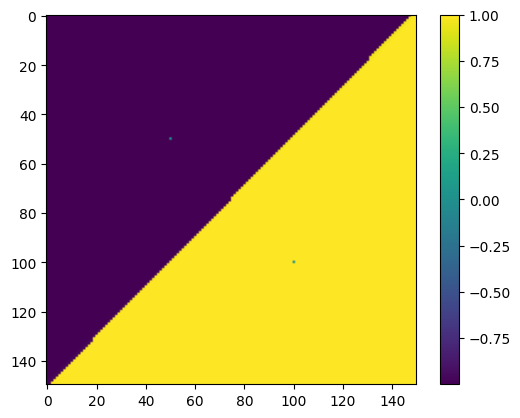

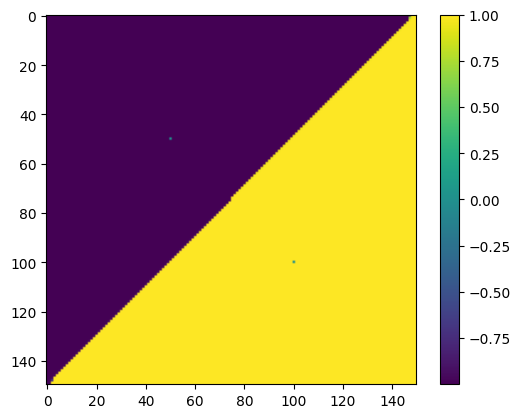

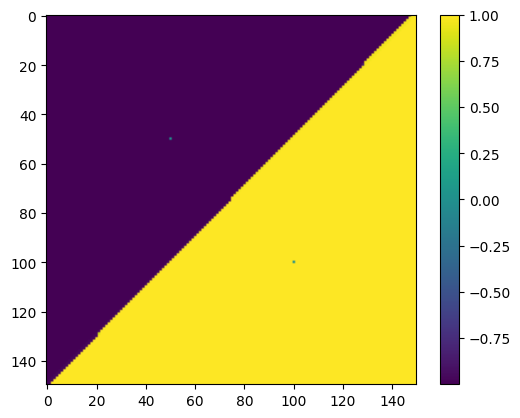

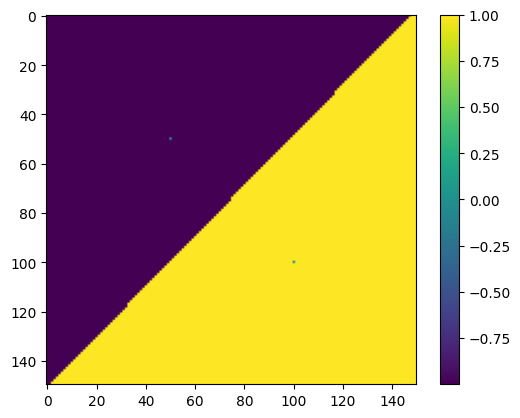

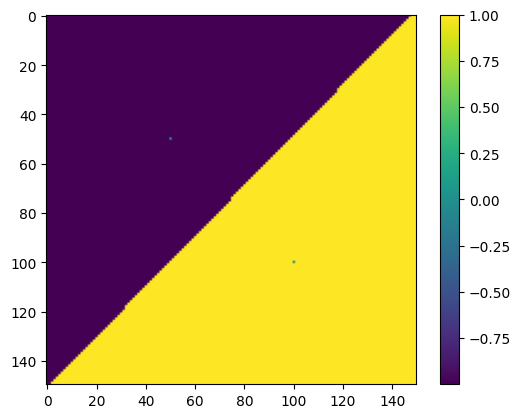

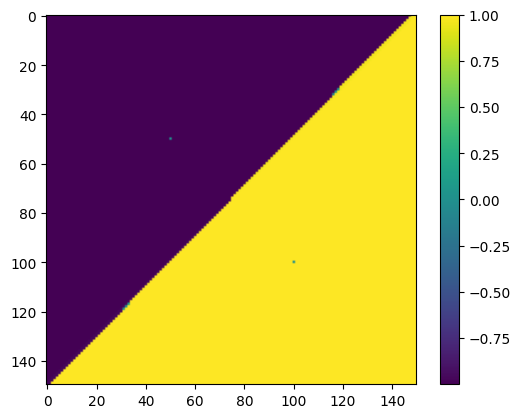

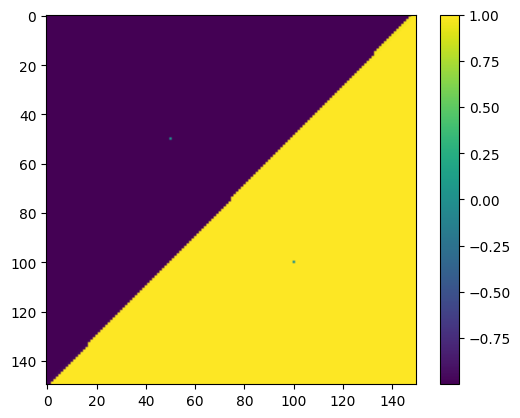

In [44]:
def loss(thoughts, targets):
    return ((thoughts - targets)**2).mean()

thoughts = neural_network_forward(torch_data)

og_loss = loss(thoughts, torch_targets)

def evolve():
    global torch_matrix_one
    global torch_bias_one
    global torch_bias_two
    global torch_matrix_two
    global torch_data
    global torch_targets
    og_loss = loss(thoughts, torch_targets)
    our_old = torch.clone(torch_matrix_one)
    for row in range(2):
        for col in range(3):
            torch_matrix_one[row,col] += np.random.rand()*10
    current_loss = loss(neural_network_forward(torch_data), torch_targets)
    if current_loss < og_loss:
        og_loss = current_loss
    else:
        for row in range(2):
            for col in range(3):
                torch_matrix_one[row,col] = our_old[row,col]

for i in range(2000):
    if i % 100 == 0:
        graph_torch()
    evolve()

In [45]:
def zero_gradients():
    global torch_matrix_one
    global torch_bias_one
    global torch_bias_two
    global torch_matrix_two

    torch_matrix_one.grad.data.zero_()
    torch_bias_one.grad.data.zero_()
    torch_matrix_two.grad.data.zero_()
    torch_bias_two.grad.data.zero_()

for i in range(100):
    thoughts = neural_network_forward(torch_data)
    loss(thoughts,torch_targets).backward()
    

    with torch.no_grad():
        torch_matrix_one -= 0.01*torch_matrix_one.grad
        torch_bias_one -= 0.01*torch_bias_one.grad
        torch_matrix_two -= 0.01*torch_matrix_two.grad
        torch_bias_two -= 0.01*torch_bias_two.grad
    if i % 10 == 0:
        graph_torch()

    zero_gradients()

/var/folders/d6/mrwmdqb90ng03jxbvq69jt840000gn/T/ipykernel_11595/1853997682.py:18: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  torch_matrix_one -= 0.01*torch_matrix_one.grad


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [57]:
class Q_network(nn.Module):
    def __init__(
        self,
        obs_dim,
        discrete_action_dim,
        hidden_dim=8,
        device="cpu",
    ):
        super(Q_network, self).__init__()
        self.device = device
        self.l1 = nn.Linear(obs_dim, hidden_dim)
        self.l2 = nn.Linear(hidden_dim, hidden_dim)
        self.l3 = nn.Linear(hidden_dim, discrete_action_dim)
        self.to(device)

    def forward(self, x):
        x = F.tanh(self.l1(x))
        x = F.tanh(self.l2(x))
        x = self.l3(x)
        return x

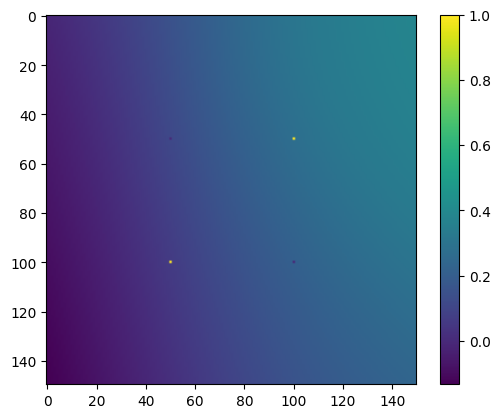

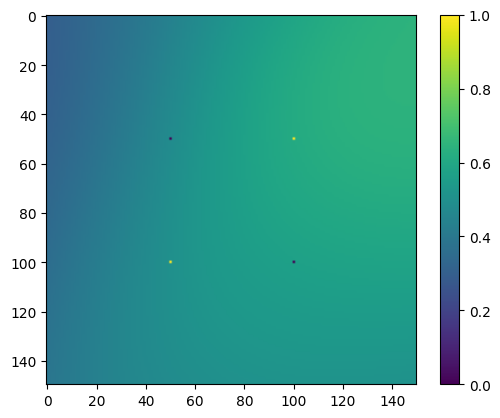

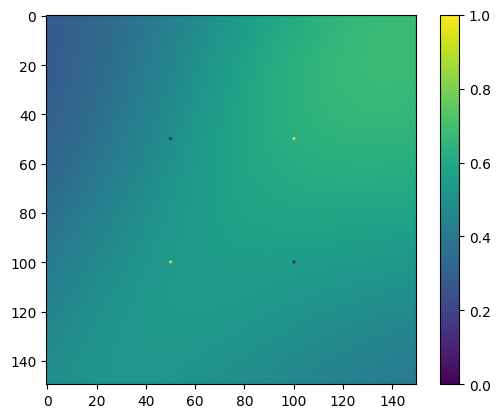

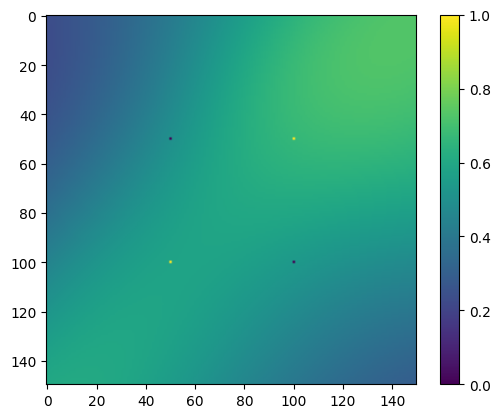

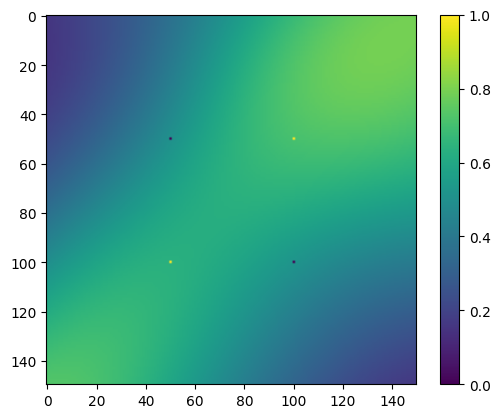

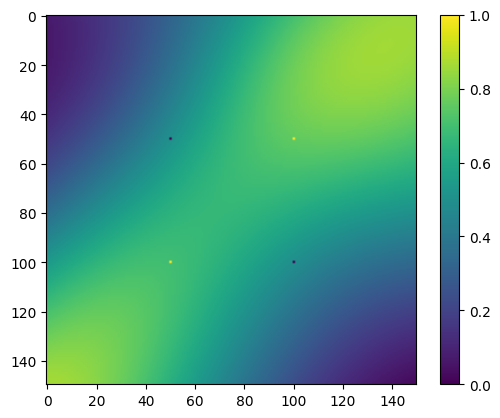

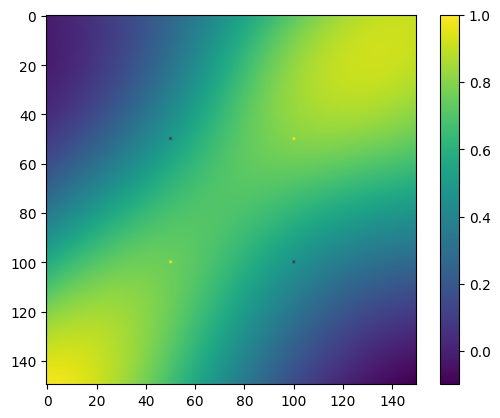

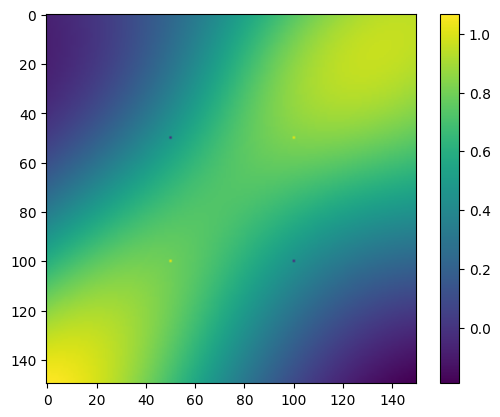

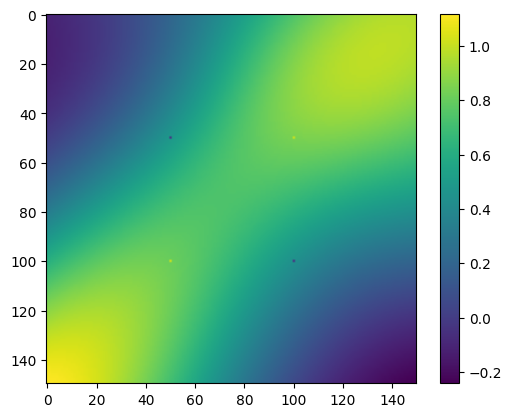

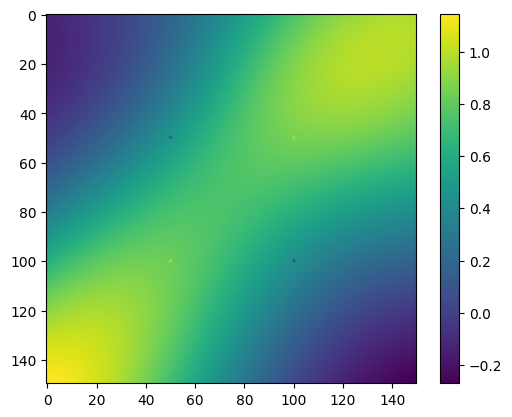

In [59]:
Q = Q_network(2,1,8)

def graph_q(Q):
    im = np.zeros((150,150))
    x = np.linspace(-1.5,1.5,150)
    y = np.linspace(-1.5,1.5,150)

    dat = torch.zeros((150*150,2)).float()
    for row,r_val in enumerate(y):
        for col,c_val in enumerate(x):
            dat[row*150+col,0] = r_val
            dat[row*150+col,1] = c_val
    with torch.no_grad():
        thoughts = Q(dat)
        
    for row in range(150):
        for col in range(150):
            im[row,col] = thoughts[row*150+col]

        #im[row,col]
    im[50,50] = our_targets[0]
    im[50,100] = our_targets[1]
    im[100,50] = our_targets[2]
    im[100,100] = our_targets[3]
    plt.imshow(im)
    plt.colorbar()
    plt.show()

for i in range(100):
    Q.zero_grad()
    dat = torch_data + (torch.rand(4,2).float()-0.5)
    thoughts = Q.forward(torch_data + torch.randn(4,2)*0.1)
    thoughts = Q.forward(torch_data)
    loss = ((thoughts - torch_targets.unsqueeze(-1))**2).mean()
    loss.backward()

    with torch.no_grad():
        for p in Q.parameters():
            p -= 0.1*p.grad

    if i % 10 == 0:
        graph_q(Q)

In [67]:
env = gym.make("CartPole-v1")
obs, info = env.reset()
gamma = 0.99
learning_rate = 0.01
Q = Q_network(obs.shape[0],2,16)
optimizer = optim.Adam(Q.parameters(), lr=3e-4)
Q.zero_grad()

# def obs_to_discrete(obs):
#   disc = 0
#   for i in range(len(obs)):
#     disc += int(obs[i]>0)*(2**(i))
#   return disc

states = np.zeros((10000,4))
states_ = np.zeros((10000,4))
actions = np.zeros((10000,1), dtype=np.int64)
rewards = np.zeros((10000))
dones = np.zeros((10000))
current_step = 0
max_step = 0

def e_greedy_policy(Q, state, epsilon):
  with torch.no_grad():
    r = np.random.random()
    if r < epsilon:
      return np.random.randint(0,2)
    else:
      #print(torch.tensor(state).unsqueeze(-1))
      return torch.argmax(Q(torch.tensor(state).float())).item()

def print_policy(Q):
  for state in range(len(Q)):
    act = torch.argmax(Q(torch.tensor(state).float())).item()
    print(f"state: {state} action {act}{actions[act]}")


reward_hist = []
reward_sum = 0
eps = 1.0
for n_iter in range(5000):
  print(reward_sum)
  #print(Q)
  #input(f"go again? {reward_sum}")
  obs, info = env.reset()
  done = False
  reward_sum = 0
  eps=eps*0.999
  print(eps)
  while not done:

    #state = obs_to_discrete(obs)
    state=obs
    action = e_greedy_policy(Q,state,eps) # 100/(n_iter+1)
    new_obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    reward_sum += reward

    new_state = new_obs# obs_to_discrete(new_obs)


    states[current_step%10000] = state
    states_[current_step%10000] = new_state
    actions[current_step%10000] = action
    rewards[current_step%10000] = reward
    dones[current_step%10000] = int(not done)
    current_step += 1
    max_step = max(max_step,current_step)

    if max_step > 1000:
      idx = np.random.choice(np.arange(min(max_step,10000-1)),128)
      optimizer.zero_grad()

      with torch.no_grad():
        #print(torch.tensor(states_[idx]).shape)
        #print(torch.max(Q(    torch.tensor(states_[idx]).float()    ), dim=-1))
        q_new = torch.tensor(rewards[idx]) + torch.tensor(dones[idx])*gamma*torch.max(Q(    torch.tensor(states_[idx]).float()    ), dim=-1).values

      q_old = torch.gather(Q(torch.tensor(states[idx]).float()),   -1,   index=torch.tensor(actions[idx])).squeeze(-1)

      #print("help me")
      #print(q_new)
      #print(q_old)
      loss = ((q_old-q_new)**2).mean()
      loss.backward()
      optimizer.step()

    obs = new_obs

  reward_hist.append(reward_sum)




0
0.999
66.0
0.998001
13.0
0.997002999
14.0
0.996005996001
14.0
0.995009990004999
12.0
0.994014980014994
31.0
0.993020965034979
17.0
0.9920279440699441
9.0
0.9910359161258742
19.0
0.9900448802097482
14.0
0.9890548353295385
10.0
0.988065780494209
18.0
0.9870777147137147
11.0
0.986090636999001
39.0
0.9851045463620021
22.0
0.98411944181564
12.0
0.9831353223738244
18.0
0.9821521870514506
23.0
0.9811700348643991
19.0
0.9801888648295347
36.0
0.9792086759647052
14.0
0.9782294672887405
12.0
0.9772512378214517
21.0
0.9762739865836303
17.0
0.9752977125970467
15.0
0.9743224148844496
11.0
0.9733480924695651
24.0
0.9723747443770956
11.0
0.9714023696327185
13.0
0.9704309672630859
20.0
0.9694605362958227
53.0
0.9684910757595269
28.0
0.9675225846837673
27.0
0.9665550620990835
18.0
0.9655885070369844
16.0
0.9646229185299474
11.0
0.9636582956114175
17.0
0.9626946373158061
19.0
0.9617319426784903
18.0
0.9607702107358118
19.0
0.959809440525076
10.0
0.9588496310845509
25.0
0.9578907814534664
37.0
0.9569328

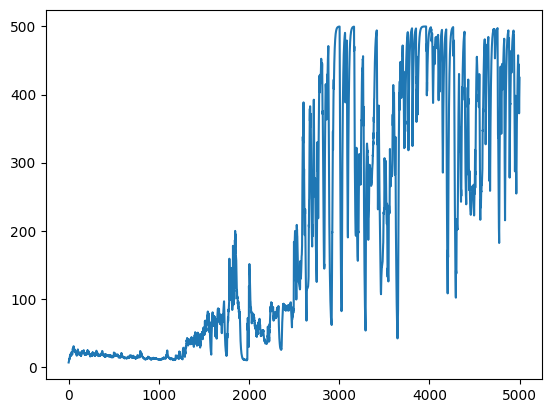

In [68]:
import matplotlib.pyplot as plt

lpsmooth = []
last = 0
for r in reward_hist:
  lpsmooth.append(0.9*last+0.1*r)
  last = lpsmooth[-1]
plt.plot(lpsmooth)
plt.show()